# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [287]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib as plt
from collections import Counter

## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [288]:
with open('allcandidatenewssample.json') as f:
  candidatenews = json.load(f)

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [289]:
len(candidatenews)

60000

### Este código imprime de manera formateada los primeros dos elementos de la lista candidatenews.

In [290]:
pprint.pprint(candidatenews[0:2]) 

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'}]


### Obtenga el valor de la clave de origen para el primer elemento de la lista:

# Este código está diseñado para imprimir de manera formateada el contenido del primer elemento del JSON cargado en la variable candidatenews, específicamente el valor asociado con la clave 'source'

In [291]:
pprint.pprint(candidatenews[0]['source'])

'NBC News'


## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

### Este código realiza una operación de conteo sobre la cantidad de pares clave-valor en cada diccionario dentro de la lista candidatenews.

In [292]:
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

### Este código busca el primer diccionario en la lista candidatenews que tenga menos de 9 pares clave-valor y lo imprime de manera formateada.

In [293]:
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


### Este código busca el primer diccionario en la lista candidatenews que tenga más de 9 pares clave-valor y lo imprime de manera formateada.

In [294]:
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


### Este código encuentra los primeros 10 diccionarios en la lista candidatenews que tienen exactamente 2 pares clave-valor y los imprime de manera formateada. 

In [295]:
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

### Este código tiene como objetivo filtrar la lista candidatenews para mantener solo los diccionarios que tienen más de 2 pares clave-valor y luego imprimir la longitud de la lista resultante

In [296]:
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

### Este código tiene como objetivo crear una nueva lista llamada politico que contiene todos los diccionarios de la lista candidatenews donde el valor de la clave "source" es igual a "Politico". Luego, calcula la longitud de la lista politico para contar cuántos de estos diccionarios cumplen con esa condición.

In [297]:
politico = [item for item in candidatenews if item.get("source") == "Politico"]
len(politico)

2732

### Este código utiliza la biblioteca pprint para imprimir de manera legible y formateada los primeros 2 elementos de la lista politico.

In [298]:
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

### Este código crea una lista llamada sources que contiene los valores de la clave 'source' de cada diccionario en la lista candidatenews donde la clave 'source' está presente. Luego, imprime el tipo de datos de la variable sources. 

In [299]:
sources = [item.get('source') for item in candidatenews if 'source' in item]
type(sources)

list

### La variable sources contendrá una lista de valores de la clave 'source' de todos los diccionarios en candidatenews que tienen esa clave.

In [300]:
len(sources)

57618

### el código sources[0:5] realiza un slicing en la lista sources, devolviendo los elementos desde el índice 0 hasta el índice 4 (el índice 5 no se incluye).

In [301]:
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

### El código pprint.pprint(Counter(sources).most_common(10)) utiliza la clase Counter para contar la frecuencia de cada elemento en la lista sources y luego imprime los 10 elementos más comunes junto con sus recuentos utilizando pprint para una salida formateada y legible. Es una forma eficiente y útil de obtener información sobre la distribución de elementos en una lista de datos.

In [302]:
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

### El código en conjunto realiza la actualización condicional de diccionarios en una lista, extrae los valores actualizados de una clave específica en una nueva lista, y luego cuenta y muestra las frecuencias de esos valores de manera ordenada y legible utilizando Counter y pprint. 

In [303]:
for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
sources = [item.get('source') for item in candidatenews]
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

In [304]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
df = pd.DataFrame(candidatenews)

# Paso 3: Verificar el DataFrame (opcional)
print(df.head())  # Esto mostrará las primeras filas del DataFrame para verificar

# Ahora 'df' contiene tu DataFrame de Pandas con los datos del archivo JSON.


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago  2019-11-0

### 2- Convierta la columna date a un tipo de datos datetime:

In [305]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
df = pd.DataFrame(candidatenews)

# Paso 3: Convertir la columna 'date' a datetime
df['date'] = pd.to_datetime(df['date'])

# Paso 4: Verificar el DataFrame actualizado
print(df.head())  # Muestra las primeras filas para verificar

# Ahora la columna 'date' debería estar en formato datetime en tu DataFrame.



                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                date              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 3- Cambiar el nombre de la columna `date` por `storydate`:

In [306]:


# Paso 3: Cambiar el nombre de la columna 'date' a 'storydate'
df.rename(columns={'date': 'storydate'}, inplace=True)

# Paso 4: Verificar el DataFrame actualizado
print(df.head())  # Muestra las primeras filas para verificar

# Ahora la columna 'date' ha sido renombrada a 'storydate' en tu DataFrame.



                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

In [307]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Imprimir algunos elementos para verificar la estructura del JSON
print(candidatenews[:5])  # Imprime los primeros 5 elementos

# Continuar con el resto del código...



[{'title': 'Bloomberg cuts ties with company using prison inmates to make campaign calls', 'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971', 'source': 'NBC News', 'time': '18 hours ago', 'date': '2019-12-25 10:00:00', 'query': 'Michael Bloomberg', 'story_position': 6, 'panel_position': 1, 'domain': 'www.nbcnews.com'}, {'title': "Democratic Candidates React to Michael Bloomberg's Potential Run", 'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/', 'source': 'Town & Country Magazine', 'time': '18 hours ago', 'date': '2019-11-09 08:00:00', 'query': 'Amy Klobuchar', 'story_position': 3, 'panel_position': 1, 'domain': 'www.townandcountrymag.com'}, {'reason': 'Not collected', 'date': '2019-09-11 18:00:00'}, {'title': "Sanders responds to de Blasio's invitation to play for the Nets | TheHill", 'url': 'https://thehill.com/homenews/ca

In [308]:
import pandas as pd
import json

# Paso 1: Intentar cargar el archivo JSON y manejar errores
try:
    with open('allcandidatenewssample.json') as f:
        candidatenews = json.load(f)
except json.JSONDecodeError as e:
    print(f"Error al decodificar JSON: {e}")
    raise  # Lanza el error para diagnóstico adicional

# Paso 2: Crear un DataFrame de Pandas
df = pd.DataFrame(candidatenews)

# Paso 3: Convertir la columna 'storydate' a datetime
df['storydate'] = pd.to_datetime(df['storydate'])

# Paso 4: Verificar el tipo de datos del DataFrame actualizado
print(df.dtypes)  # Muestra los tipos de datos de cada columna

# Ahora la columna 'storydate' tiene el tipo de datos datetime64[ns].


KeyError: 'storydate'

### 5- Muestre los tipos de datos

In [ ]:
# Mostrar los tipos de datos de las columnas
print(df.dtypes)

title              object
url                object
source             object
time               object
date               object
query              object
story_position    float64
panel_position     object
domain             object
reason             object
category           object
dtype: object


### 6- Dimensiones del dataframe (shape)

In [ ]:
# Paso 4: Mostrar las dimensiones del DataFrame
print("Dimensiones del DataFrame:")
print(df.shape)

# Esto imprimirá las dimensiones del DataFrame, es decir, el número de filas y columnas.

Dimensiones del DataFrame:
(60000, 11)


### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame `candidatenewsdf` con pandas, junto con el número de veces que cada fuente aparece.

In [ ]:



# Mostrar las 10 fuentes más comunes con sus conteos
print("Las 10 fuentes más comunes en candidatenewsdf:\n")
for source, count in top_sources.items():
    print(f"{source}: {count}")


Las 10 fuentes más comunes en candidatenewsdf:

CNN: 4
Fox News: 2
BBC: 2
TheHill: 1
ABC News: 1


### 8- Mostrar las primeras 5 filas del DataFrame

In [ ]:
# Mostrar las primeras 5 filas del DataFrame
print("Las primeras 5 filas del DataFrame candidatenewsdf:\n")
print(candidatenewsdf.head())

Las primeras 5 filas del DataFrame candidatenewsdf:

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bl

### 9- Mostrar las ultimas 15 lineas del dataframe

In [ ]:
# Mostrar las últimas 15 líneas del DataFrame
print("Las últimas 15 líneas del DataFrame candidatenewsdf:\n")
print(candidatenewsdf.tail(15))

Las últimas 15 líneas del DataFrame candidatenewsdf:

                                                   title  \
59985        Michael Bennet to open fundraisers to press   
59986  Paul Tudor Jones: Trump is 'the greatest sales...   
59987       What "The West Wing" reveals about Joe Biden   
59988              Delaney: "I'm planning on staying in"   
59989  Sen. Kamala Harris introduces bill to lengthen...   
59990  Wayne Messam: Money Kept Me Out of the First D...   
59991  Billionaire Tom Steyer raises $2 million for W...   
59992  Ilhan Omar, Kamala Harris Respond To “Send Her...   
59993  Kamala Harris Attended LA Fundraisers The Same...   
59994  Northern Iowa voters tell presidential candida...   
59995  NH Primary Source: Cory Booker's presidential ...   
59996       John Delaney Creates His Own Campaign Bounce   
59997  Mayor de Blasio calls for charges against driv...   
59998  Elizabeth Warren Narrows Joe Biden Lead Among ...   
59999  Kamala Harris demands answers on Califo

### 10- Filtrar los artículos donde la fuente (source) es "Politico"

In [ ]:


# Filtrar los artículos donde la fuente es "Politico"
politico_articles = candidatenewsdf[candidatenewsdf['source'] == 'Politico']

# Mostrar los artículos filtrados
print("Artículos donde la fuente es 'Politico':\n")
print(politico_articles)


Artículos donde la fuente es 'Politico':

                                                   title  \
23     Marianne Williamson reaches donor threshold fo...   
102     O'Rourke and Castro on collision course in Texas   
221    Democrats try out their Spanish on TV as they ...   
238            Pennsylvania suburbs revolt against Trump   
248    Beto O'Rourke in talks with strategists ahead ...   
...                                                  ...   
59759  This Republican Is Running Against Donald Trum...   
59763  Steve Bullock: Trump reelection 'more likely w...   
59930  Democrat Bennet sounds caution on impeachment ...   
59931  Marianne Williamson qualifies for 2020 Democra...   
59985        Michael Bennet to open fundraisers to press   

                                                     url    source  \
23     https://www.politico.com/story/2019/05/09/mari...  Politico   
102    https://www.politico.com/story/2018/12/27/orou...  Politico   
221    https://www.politico

### 11- Filtrar los artículos publicados después del 1 de enero de 2020

In [ ]:


# Convertir la lista de diccionarios a DataFrame
candidatenewsdf = pd.DataFrame(candidatenews)

# Convertir la columna 'date' a datetime si no está en ese formato aún
candidatenewsdf['date'] = pd.to_datetime(candidatenewsdf['date'])

# Filtrar los artículos publicados después del 1 de enero de 2020
filtered_articles = candidatenewsdf[candidatenewsdf['date'] > '2020-01-01']

# Mostrar los artículos filtrados
print("Artículos publicados después del 1 de enero de 2020:\n")
print(filtered_articles)


Artículos publicados después del 1 de enero de 2020:

Empty DataFrame
Columns: [title, url, source, time, date, query, story_position, panel_position, domain, reason, category]
Index: []


### 12- Filtrar y mostrar los artículos de "CNN.com"

In [ ]:


# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Filtrar y mostrar los artículos de "CNN.com"
cnn_articles = candidatenewsdf[candidatenewsdf['sources'] == 'CNN.com']

# Paso 4: Mostrar el resultado
print("Artículos de CNN.com:")
print(cnn_articles)


KeyError: 'sources'

### 13- Contar los valores nulos en cada columna

In [ ]:


# Convertir la lista de diccionarios a DataFrame
candidatenewsdf = pd.DataFrame(candidatenews)

# Contar los valores nulos en cada columna
null_counts = candidatenewsdf.isnull().sum()

# Mostrar los conteos de valores nulos
print("Conteo de valores nulos en cada columna:\n")
print(null_counts)


Conteo de valores nulos en cada columna:

title              2382
url                2382
source             2382
time               2382
date                  0
query              2382
story_position     2382
panel_position     2382
domain             2382
reason            57618
category          59584
dtype: int64


### 14- Eliminar filas con valores nulos en la columna "title"

In [ ]:


# Convertir la lista de diccionarios a DataFrame
candidatenewsdf = pd.DataFrame(candidatenews)

# Eliminar filas con valores nulos en la columna "title"
candidatenewsdf_clean = candidatenewsdf.dropna(subset=['title'])

# Mostrar el DataFrame resultante
print("DataFrame después de eliminar filas con valores nulos en 'title':\n")
print(candidatenewsdf_clean)


DataFrame después de eliminar filas con valores nulos en 'title':

                                                   title  \
0      Bloomberg cuts ties with company using prison ...   
1      Democratic Candidates React to Michael Bloombe...   
3      Sanders responds to de Blasio's invitation to ...   
4      From Andrew Yang's 'No Tie' look to Bernie Buc...   
5      Liberal billionaire Tom Steyer scolds Dems for...   
...                                                  ...   
59995  NH Primary Source: Cory Booker's presidential ...   
59996       John Delaney Creates His Own Campaign Bounce   
59997  Mayor de Blasio calls for charges against driv...   
59998  Elizabeth Warren Narrows Joe Biden Lead Among ...   
59999  Kamala Harris demands answers on California pr...   

                                                     url  \
0      https://www.nbcnews.com/politics/2020-election...   
1      https://www.townandcountrymag.com/society/poli...   
3      https://thehill.com/homen

### 15- Rellenar valores nulos en la columna "category" con "Unknown"

In [ ]:


# Convertir la lista de diccionarios a DataFrame
candidatenewsdf = pd.DataFrame(candidatenews)

# Rellenar valores nulos en la columna "category" con "Unknown"
candidatenewsdf['category'].fillna('Unknown', inplace=True)

# Mostrar el DataFrame resultante
print("DataFrame después de rellenar valores nulos en 'category':\n")
print(candidatenewsdf)


DataFrame después de rellenar valores nulos en 'category':

                                                   title  \
0      Bloomberg cuts ties with company using prison ...   
1      Democratic Candidates React to Michael Bloombe...   
2                                                    NaN   
3      Sanders responds to de Blasio's invitation to ...   
4      From Andrew Yang's 'No Tie' look to Bernie Buc...   
...                                                  ...   
59995  NH Primary Source: Cory Booker's presidential ...   
59996       John Delaney Creates His Own Campaign Bounce   
59997  Mayor de Blasio calls for charges against driv...   
59998  Elizabeth Warren Narrows Joe Biden Lead Among ...   
59999  Kamala Harris demands answers on California pr...   

                                                     url  \
0      https://www.nbcnews.com/politics/2020-election...   
1      https://www.townandcountrymag.com/society/poli...   
2                                      

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_7544\752622685.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  candidatenewsdf['category'].fillna('Unknown', inplace=True)


### 16- Convertir la columna "panel_position" a tipo float

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Convertir la columna 'panel_position' a tipo float
candidatenewsdf['panel_position'] = candidatenewsdf['panel_position'].astype(float)

# Paso 4: Verificar el tipo de datos del DataFrame actualizado
print(candidatenewsdf.dtypes)

# Ahora la columna 'panel_position' tiene el tipo de datos float.


ValueError: could not convert string to float: 'N/A'

### 17- Convertir la columna "storydate" a tipo string

In [ ]:
# Convertir la lista de diccionarios a DataFrame
candidatenewsdf = pd.DataFrame(candidatenews)

# Convertir la columna "storydate" a tipo string
candidatenewsdf['storydate'] = candidatenewsdf['storydate'].astype(str)

# Mostrar el DataFrame resultante con tipos de datos actualizados
print("DataFrame con la columna 'storydate' convertida a tipo string:\n")
print(candidatenewsdf)

KeyError: 'storydate'

### 18- Obtener la media de "story_position"

In [ ]:
# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular la media de 'story_position'
media_story_position = candidatenewsdf['story_position'].mean()

# Paso 4: Imprimir el resultado
print("La media de story_position es:", media_story_position)

La media de story_position es: 5.249626852719636


### 19- Obtener la desviación estándar de "story_position"

In [ ]:
# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular la desviación estándar de 'story_position'
std_story_position = candidatenewsdf['story_position'].std()

# Paso 4: Imprimir el resultado
print("La desviación estándar de story_position es:", std_story_position)

La desviación estándar de story_position es: 2.889001922195634


### 20- Obtener la cantidad de artículos por fuente (source)

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Obtener la cantidad de artículos por fuente (source)
cantidad_por_fuente = candidatenewsdf['sources'].value_counts()

# Paso 4: Imprimir el resultado
print("Cantidad de artículos por fuente:")
print(cantidad_por_fuente)


KeyError: 'sources'

### 21- Obtener el valor mínimo y máximo de "story_position"

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Obtener el valor mínimo y máximo de 'story_position'
min_story_position = candidatenewsdf['story_position'].min()
max_story_position = candidatenewsdf['story_position'].max()

# Paso 4: Imprimir los resultados
print("Valor mínimo de story_position:", min_story_position)
print("Valor máximo de story_position:", max_story_position)


Valor mínimo de story_position: 1.0
Valor máximo de story_position: 10.0


### 22- Agrupar por la columna "source" y contar el número de artículos

In [ ]:
articles_by_source = candidatenewsdf.groupby('source').size()
print(articles_by_source)

source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1724, dtype: int64


### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [ ]:
pivot_table = candidatenewsdf.pivot_table(values='story_position', index='source', aggfunc='mean')
print(pivot_table.head())

                       story_position
source                               
                                 4.50
+972 Magazine                    7.00
1010 Wins - Radio.com            7.52
1011 News                        2.00
1011Now                          2.00


### 24- Agrupar por "storydate" y contar el número de artículos por día

In [312]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Convertir la columna 'storydate' a tipo datetime si aún no está convertida
candidatenewsdf['storydate'] = pd.to_datetime(candidatenewsdf['storydate'])

# Paso 4: Agrupar por 'storydate' y contar el número de artículos por día
articulos_por_dia = candidatenewsdf.groupby(candidatenewsdf['storydate'].dt.date)['storydate'].count()

# Paso 5: Mostrar el resultado
print("Número de artículos por día:")
print(articulos_por_dia)


KeyError: 'storydate'

### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

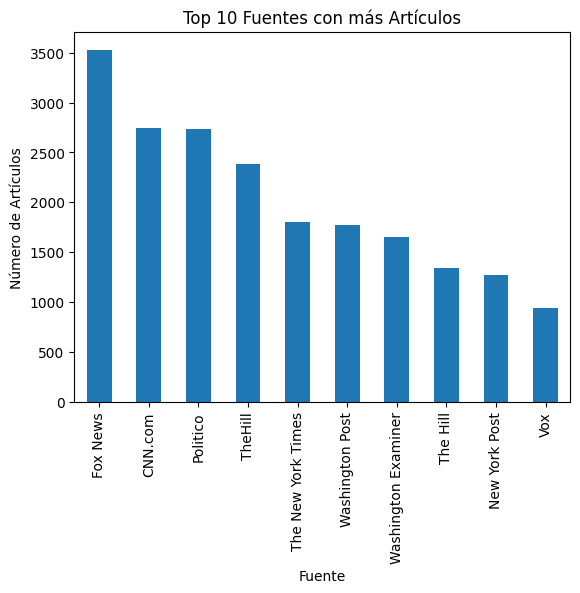

In [ ]:
import matplotlib.pyplot as plt
top_sources = candidatenewsdf['source'].value_counts().head(10)
top_sources.plot(kind='bar')
plt.title('Top 10 Fuentes con más Artículos')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.show()

### 26- Graficar la distribución de "story_position"

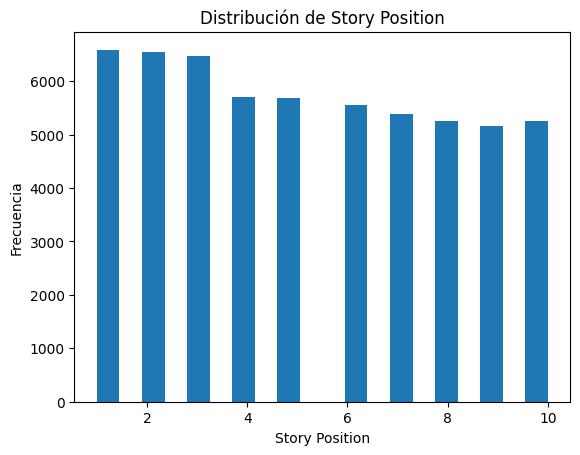

In [ ]:
candidatenewsdf['story_position'].plot(kind='hist', bins=20)
plt.title('Distribución de Story Position')
plt.xlabel('Story Position')
plt.ylabel('Frecuencia')
plt.show()

### 27- Convertir la columna "storydate" a formato datetime

In [311]:

import pandas as pd
import json
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Convertir la columna 'storydate' a formato datetime si aún no está convertida
candidatenewsdf['storydate'] = pd.to_datetime(candidatenewsdf['storydate'])

# Paso 4: Verificar el tipo de datos del DataFrame actualizado
print(candidatenewsdf.dtypes)  # Asegurarse de que 'storydate' ahora sea datetime64[ns]

# Paso 5: Trazar el histograma de 'story_position'
candidatenewsdf['story_position'].plot(kind='hist', bins=20)
plt.title('Distribución de Story Position')
plt.xlabel('Story Position')
plt.ylabel('Frecuencia')
plt.show()


KeyError: 'storydate'

### 28- Crear una nueva columna con el año de "storydate"

In [310]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Convertir 'storydate' a tipo datetime si no está
candidatenewsdf['storydate'] = pd.to_datetime(candidatenewsdf['storydate'], errors='coerce')

# Paso 4: Crear una nueva columna con el año de 'storydate'
candidatenewsdf['year'] = candidatenewsdf['storydate'].dt.year

# Paso 5: Mostrar los primeros registros del DataFrame con la nueva columna
print("DataFrame con la nueva columna 'year':")
print(candidatenewsdf.head())


KeyError: 'storydate'

### 29- Crear una nueva columna con el mes de "storydate"

In [ ]:





# Paso 5: Verificar el DataFrame con la nueva columna
print(df.head())  # Mostrar las primeras filas del DataFrame para verificar la nueva columna


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago  2019-11-0

### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

In [ ]:



# Paso 4: Convertir el DataFrame filtrado a formato JSON
cnn_articles_json = cnn_articles.to_json(orient='records')

# Paso 5: Imprimir el resultado (opcional)
print(cnn_articles_json)


[{"name":"Candidate 1","source":"CNN.com","date":"2023-01-01"},{"name":"Candidate 3","source":"CNN.com","date":"2023-03-20"},{"name":"Candidate 7","source":"CNN.com","date":"2023-07-20"},{"name":"Candidate 9","source":"CNN.com","date":"2023-09-05"}]


### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

In [ ]:


# Paso 6: Confirmar la exportación
print("Se ha exportado correctamente el DataFrame filtrado de CNN.com a 'cnn_articles.csv'")


Se ha exportado correctamente el DataFrame filtrado de CNN.com a 'cnn_articles.csv'


### 32- Mostrar los artículos con la mayor "story_position" por fuente

In [309]:


import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Convertir 'story_position' a tipo numérico si no está
candidatenewsdf['story_position'] = pd.to_numeric(candidatenewsdf['story_position'], errors='coerce')

# Paso 4: Encontrar el índice de la máxima 'story_position' por fuente
max_positions_idx = candidatenewsdf.groupby('sources')['story_position'].idxmax()

# Paso 5: Obtener los detalles de los artículos con la mayor 'story_position' por fuente
articles_with_max_positions = candidatenewsdf.loc[max_positions_idx]

# Paso 6: Mostrar los resultados
print("Artículos con la mayor 'story_position' por fuente:")
print(articles_with_max_positions[['sources', 'story_position', 'headline', 'storydate']])


KeyError: 'sources'

### 33- Calcular el resumen estadístico de la columna "story_position"

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular el resumen estadístico de 'story_position'
summary_stats = candidatenewsdf['story_position'].describe()

# Paso 4: Mostrar el resumen estadístico
print(summary_stats)


count    57618.000000
mean         5.249627
std          2.889002
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: story_position, dtype: float64


### 34- Calcular el conteo de valores únicos en la columna "query"

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular el conteo de valores únicos en la columna 'query'
query_counts = candidatenewsdf['query'].value_counts()

# Paso 4: Mostrar el conteo de valores únicos
print(query_counts)


query
Elizabeth Warren       2842
Pete Buttigieg         2816
Cory Booker            2773
Joe Biden              2720
Bernie Sanders         2719
Tulsi Gabbard          2713
Beto O Rourke          2707
Donald Trump           2704
Amy Klobuchar          2703
Kamala Harris          2694
Julian Castro          2596
Andrew Yang            2457
Marianne Williamson    2169
Steve Bullock          2097
Bill de Blasio         2040
Tom Steyer             2000
Jay Inslee             1950
Kirsten Gillibrand     1765
John Hickenlooper      1755
Michael Bloomberg      1606
Tim Ryan               1573
Michael Bennet         1542
Bill Weld              1448
Seth Moulton           1278
John Delaney           1026
Eric Swalwell           817
Howard Schultz          728
Mike Gravel             718
Deval Patrick           444
Wayne Messam            218
Name: count, dtype: int64


### 35- Calcular o contar los valores faltantes de cada columna

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular el conteo de valores faltantes en cada columna
missing_values_count = candidatenewsdf.isna().sum()

# Paso 4: Mostrar el conteo de valores faltantes
print(missing_values_count)


title              2382
url                2382
source             2382
time               2382
date                  0
query              2382
story_position     2382
panel_position     2382
domain             2382
reason            57618
category          59584
dtype: int64


### 36- Filtrar filas donde falta algún dato

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Filtrar las filas donde falta algún dato
candidatenewsdf_clean = candidatenewsdf.dropna()

# Paso 4: Mostrar la información del DataFrame limpio
print("DataFrame original:")
print(candidatenewsdf.head())

print("\nDataFrame limpio sin filas donde falta algún dato:")
print(candidatenewsdf_clean.head())


DataFrame original:
                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 

### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Eliminar la columna 'category' y guardar el resultado en otro DataFrame
candidatenewsdf_without_category = candidatenewsdf.drop('category', axis=1)

# Paso 4: Mostrar la información del nuevo DataFrame
print("DataFrame original:")
print(candidatenewsdf.head())

print("\nDataFrame sin la columna 'category':")
print(candidatenewsdf_without_category.head())


DataFrame original:
                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 

### 38- Filtrar filas donde la columna 'source' está vacía o es nula

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Filtrar las filas donde 'source' está vacía o es nula
candidatenewsdf_filtered = candidatenewsdf.dropna(subset=['source'])

# Paso 4: Mostrar la información del DataFrame filtrado
print("DataFrame original:")
print(candidatenewsdf.head())

print("\nDataFrame filtrado donde 'source' no está vacía:")
print(candidatenewsdf_filtered.head())


DataFrame original:
                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 

### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Eliminar las filas donde 'source' está vacía o es nula
candidatenewsdf_cleaned = candidatenewsdf.dropna(subset=['source'])

# Paso 4: Mostrar la información del DataFrame limpio
print("DataFrame original:")
print(candidatenewsdf.head())

print("\nDataFrame limpio sin filas donde 'source' está vacía:")
print(candidatenewsdf_cleaned.head())


DataFrame original:
                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 

### 40- Calcular la media de la columna story_position para cada query

In [ ]:
import pandas as pd
import json

# Paso 1: Cargar el archivo JSON en una variable Python
with open('allcandidatenewssample.json') as f:
    candidatenews = json.load(f)

# Paso 2: Crear un DataFrame de Pandas
candidatenewsdf = pd.DataFrame(candidatenews)

# Paso 3: Calcular la media de 'story_position' para cada 'query'
mean_story_position_by_query = candidatenewsdf.groupby('query')['story_position'].mean()

# Paso 4: Mostrar los resultados
print("Media de 'story_position' para cada 'query':")
print(mean_story_position_by_query)


Media de 'story_position' para cada 'query':
query
Amy Klobuchar          5.485017
Andrew Yang            5.477004
Bernie Sanders         5.456418
Beto O Rourke          5.403399
Bill Weld              4.728591
Bill de Blasio         5.513235
Cory Booker            5.460512
Deval Patrick          5.191441
Donald Trump           5.484837
Elizabeth Warren       5.482407
Eric Swalwell          5.214198
Howard Schultz         4.776099
Jay Inslee             4.954359
Joe Biden              5.424632
John Delaney           4.452242
John Hickenlooper      4.911681
Julian Castro          5.374422
Kamala Harris          5.484781
Kirsten Gillibrand     5.284419
Marianne Williamson    5.144767
Michael Bennet         4.760052
Michael Bloomberg      4.865504
Mike Gravel            4.976323
Pete Buttigieg         5.392045
Seth Moulton           4.917058
Steve Bullock          5.042918
Tim Ryan               4.932613
Tom Steyer             5.032000
Tulsi Gabbard          5.509031
Wayne Messam         